## Please insert some parameters
* the name of the source 

In [1]:
source = 'Cen X-3'


### Imports

In [2]:
import hratio
import numpy as np
from astropy.table import Table
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
import shutil
import os, sys
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.coordinates import SkyCoord
from importlib import reload
from astropy.io import fits as pf

## Importing modules developed for this project:
* nustarpipeline process to wrap the nustar analysis for our needs
* nustarpipeline utils to collect useful functions
* pyxmmsas (originally for XMM) for spectral fitting


In [5]:
from nustarpipeline import process, utils
import pyxmmsas as pysas

## This is the spectral analysis.
* First find a suitable model for your source, running xspec iteratively and save the model only, use the file as input mod_file below
* the routine below provides a file files.xcm to start with a basic model called mod_base.xcm
* compute the MCMC to get eror and corner plots
* at a second iteration, you can just load the chain (comment and uncomment the lines starting with load_chain=...)
* the chain commands are to create a script to be lunched externally and need to be tuned for the correct parameter number

### load spectra and and a basic model in pyxspec

Using output file basename GW-mod_base-
   All chains are now removed.

2 spectra  in use
 
Spectral Data File: FPMA_sr_rbn.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.462e+01 +/- 5.501e-02 (99.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-2440
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 2.143e+04 sec
 Using fit statistic: chi
 Using Background File                FPMA_bk.pha
  Background Exposure Time: 2.143e+04 sec
 Using Response (RMF) File            FPMA_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  FPMA_sr.arf

Spectral Data File: FPMB_sr_rbn.pi  Spectrum 2
Net count rate (cts/s) for Spectrum:2  6.067e+01 +/- 5.310e-02 (99.9 % total)
 Assigned to Data Group 2 and Plot Group 2
  Noticed Channels:  1-2442
  Telescope: NuSTAR Instrument: FPMB  Channel Type: PI
  Exposure Time: 2.158e+04 sec
 Using fit statistic: chi
 Using Background File                FPMB_bk.pha
  Background Exposure Time: 2.158e+0

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
PGPLOT /png: writing new file as GW-mod_base-euf_plot.png_2


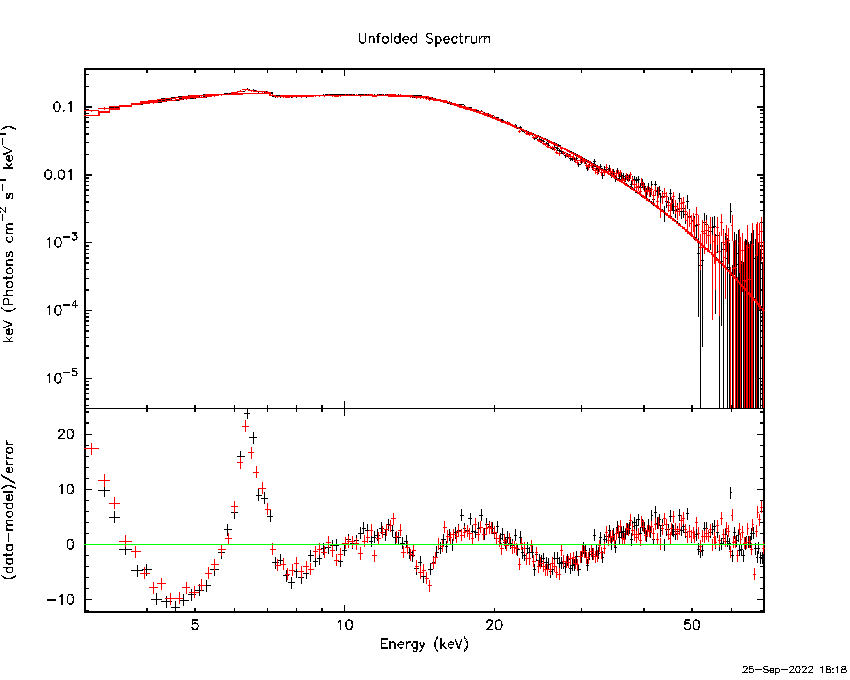

Fit Stat= 7247.602913462378 Chi2= 6974.62230831555 dof= 431

Spectral parameters:

	nH__01 11.69 10^22 (0.00-0.00)
	cutoffE__02 14.59 keV (0.00-0.00)
	foldE__03 7.97 keV (0.00-0.00)
	PhoIndex__04 1.25  (0.00-0.00)
	eMin 3 keV 
	eMax 70 keV 
	norm__07 13507.30  (0.00-0.00)
	nH 12 10^22 
	cutoffE 15 keV 
	foldE 8 keV 
	PhoIndex 1  
	eMin 3 keV 
	eMax 70 keV 
	norm__14 13422.10  (0.00-0.00)


In [159]:
import xspec

#use the base model
mod_file = 'mod_base.xcm'

#The following is an attempt to plot the model without the cyclotron lines
#mod_file = 'mod_3gabs_zero.xcm'



outputfiles_basename = 'GW-%s-' % (mod_file.replace('../mod_', '').replace('.xcm',''))

#'bxa-run-model.xcm'
pn_spec="FPMA_sr_rbn.pi"
mos1_spec="FPMB_sr_rbn.pi"
mos2_spec="none"
ignore_string=['**-3.0,70.0-**']*2
print("Using output file basename " + outputfiles_basename)


load_chain=False
compute_errors=False
perform_fit=False
save_xcm=False
run_chain=False

chain_name, fit_res =pysas.epic_xspec_mcmc_fit(xspec, mod_file, 
                                outputfiles_basename = outputfiles_basename,
                                pn_spec = pn_spec,
                                mos1_spec = mos1_spec,
                                mos2_spec =mos2_spec, 
                                jeffreys_priors=['norm', 'nH', 'cutoffE', 'foldE'],
                                               #jeffreys_priors=['norm', 'nH', 'T0', 'kT', 'taup'],
                                ignore_string=ignore_string,
                                load_chain=load_chain, perform_fit=perform_fit, set_priors=True, walkers=60, 
                                               run_chain=run_chain,
                                               compute_errors=compute_errors, save_xcm=save_xcm )


## We make a fit with a more complex model

Using output file basename GW-mod_pcfabs_2gauss_2gabs-
   All chains are now removed.

2 spectra  in use
 
Spectral Data File: FPMA_sr_rbn.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.462e+01 +/- 5.501e-02 (99.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-2440
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 2.143e+04 sec
 Using fit statistic: chi
 Using Background File                FPMA_bk.pha
  Background Exposure Time: 2.143e+04 sec
 Using Response (RMF) File            FPMA_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  FPMA_sr.arf

Spectral Data File: FPMB_sr_rbn.pi  Spectrum 2
Net count rate (cts/s) for Spectrum:2  6.067e+01 +/- 5.310e-02 (99.9 % total)
 Assigned to Data Group 2 and Plot Group 2
  Noticed Channels:  1-2442
  Telescope: NuSTAR Instrument: FPMB  Channel Type: PI
  Exposure Time: 2.158e+04 sec
 Using fit statistic: chi
 Using Background File                FPMB_bk.pha
  Background Exposure

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.


 WARNING - UnitsWarning: 'C-Statistic' did not parse as fits unit: Invalid character at col 1 If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html


nH__1
Fit statistic  : C-Statistic                  298.05     using 217 bins.
                 C-Statistic                  251.11     using 220 bins.
Total fit statistic                           549.16     with 419 d.o.f.

Test statistic : Chi-Squared                  550.42     using 437 bins.
 Null hypothesis probability of 1.60e-05 with 419 degrees of freedom
 Current data and model not fit yet.
 2.28581057119521
nH__2 38.46949151357822

Fit statistic  : C-Statistic                  350.91     using 217 bins.
                 C-Statistic                  286.49     using 220 bins.
Total fit statistic                           637.40     with 419 d.o.f.

Test statistic : Chi-Squared                  640.65     using 437 bins.
 Null hypothesis probability of 1.62e-11 with 419 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                  265.73     using 217 bins.
                 C-Statistic                  243.47     using 220 bins.
Total 

PGPLOT /png: writing new file as GW-mod_pcfabs_2gauss_2gabs-euf_plot.png_2


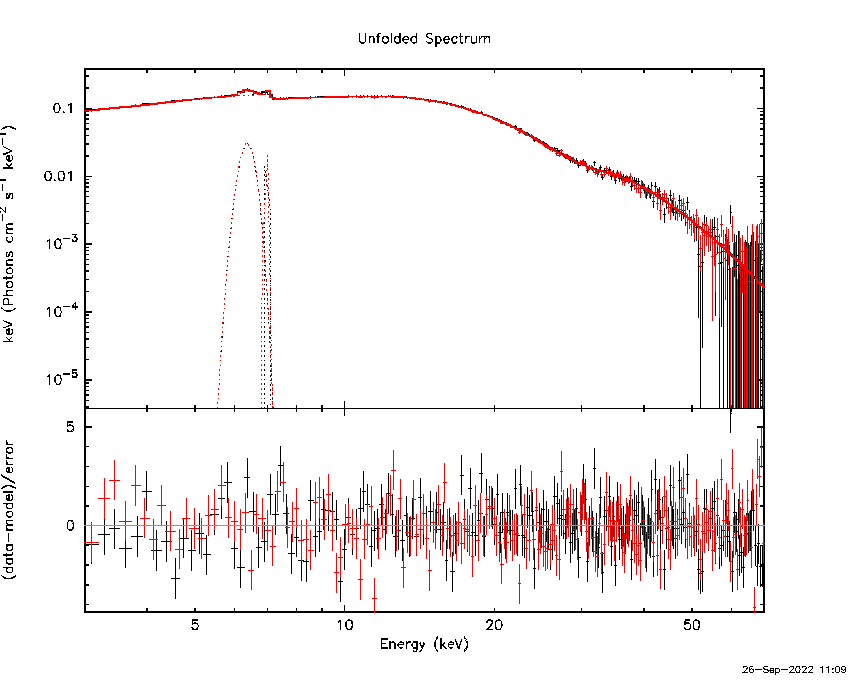

*** Parameter 15 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 16 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 17 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 18 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 19 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 22 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 23 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 25 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 26 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 27 is not a variable model parameter and no confidence range will be calculated.
*** Parameter 28 is not a variable model parameter

In [11]:
import xspec

run_chain = False
reload(pysas)
fit_by_bin={}

chains=[]
#mod_file=outputfiles_basename+'model.xcm'
#mod_file='../model_cut.xcm'
    
mod_file = 'mod_pcfabs_2gauss_2gabs.xcm'


outputfiles_basename = 'GW-%s-' % (mod_file.replace('../mod_', '').replace('.xcm',''))

#'bxa-run-model.xcm'
pn_spec="FPMA_sr_rbn.pi"
mos1_spec="FPMB_sr_rbn.pi"
mos2_spec="none"
ignore_string=['**-3.0,70.0-**']*2
print("Using output file basename " + outputfiles_basename)


if run_chain:
    load_chain=False
    compute_errors=True
    perform_fit=True
    save_xcm=True
else:
    load_chain=True
    compute_errors=True
    perform_fit=False
    save_xcm=False
    
    
chain_name, fit_res =pysas.epic_xspec_mcmc_fit(xspec, mod_file, 
                                outputfiles_basename = outputfiles_basename,
                                pn_spec = pn_spec,
                                mos1_spec = mos1_spec,
                                mos2_spec =mos2_spec, 
                                jeffreys_priors=['norm', 'nH', 'cutoffE', 'foldE'],
                                               #jeffreys_priors=['norm', 'nH', 'T0', 'kT', 'taup'],
                                ignore_string=ignore_string,
                                load_chain=load_chain, perform_fit=perform_fit, set_priors=True, walkers=60, 
                                               run_chain=run_chain,
                                               compute_errors=compute_errors, save_xcm=save_xcm, 
                                               burn=8000, runLength=64000, )
chains.append(chain_name)


chain_commands='''

chain clear
chain type gw
chain walkers 60
chain burn 26000
chain length 36000

bayes on
bayes 1 jeffreys
bayes 8 jeffreys
bayes 9 jeffreys
bayes 12 jeffreys
bayes 16 jeffreys
bayes 32 jeffreys
query yes
fit

chain proposal gaussian diagonal 1e-1 1e-5 0.2 0.5 0.1 10. 10.
chain run %schain.fits

quit
yes

'''%outputfiles_basename


exposure, tstart, tstop = pysas.get_spec_exp_times("FPMA_sr_rbn.pi")



#    break



## This estimated the goodness of fit (it is long)

In [ ]:
if False:
   
    sorted_sampled_fit_statistics, best_fit_statistic, goodness = \
    pysas.goodness_from_chain(xspec, outputfiles_basename, n_sample=1000,
                            pn_spec=pn_spec,
                            mos1_spec=mos1_spec,
                            mos2_spec=mos2_spec,
                            ignore_string=ignore_string)
    ff=open(outputfiles_basename+'simul_test.txt','w')
    for x in sorted_sampled_fit_statistics:
        ff.write("%f\n" % x)
    ff.write("%f*\n" % best_fit_statistic)
    ff.close()
    os.chdir('..')
    plt.figure()
    plt.hist(sorted_sampled_fit_statistics, bins=20, label='Sample')
    plt.axvline(best_fit_statistic, color='red', label='Best fit')
    plt.xlabel('Test statistics')
    plt.ylabel('Simulations')
    plt.legend()
    

## Please edit the next cell to display parameters of your model

In [12]:
import pyxmmsas as pysas
latex_label_dict=pysas.default_latex_label_dict.copy()
latex_label_dict.update({ 
                        'nH__01': '$N_\\mathrm{H}$',
                        'nH__1': '$N_\\mathrm{H}$',                        
    'rate' : 'Cts/s',
    'cstat': '$\chi^2_\\mathrm{red}$/d.o.f.',
    
    'LineE__15': '$E_\\mathrm{Fe}$',
    'Sigma__16': '$\sigma_\\mathrm{Fe}$',
    'norm__17': '$N_\\mathrm{Fe}$',
    
    'LineE__2' : '$E_\\mathrm{Cyc1}$',
    'LineE__02' : '$E_\\mathrm{Cyc1}$',
    'Sigma__3' : '$\sigma_\\mathrm{Cyc1}$',
    'Sigma__03' : '$\sigma_\\mathrm{Cyc1}$',
    'Strength__4' : '$\\tau_\\mathrm{Cyc1}$',
    'Strength__04' : '$\\tau_\\mathrm{Cyc1}$',
    
    'LineE__5' : '$E_\\mathrm{Cyc2}$',
    'LineE__05' : '$E_\\mathrm{Cyc2}$',
    'Sigma__6' : '$\sigma_\\mathrm{Cyc2}$',
    'Sigma__06' : '$\sigma_\\mathrm{Cyc2}$',
    'Strength__7' : '$\\tau_\\mathrm{Cyc2}$',
    'Strength__07' : '$\\tau_\\mathrm{Cyc2}$',
    
    'LineE__8' : '$E_\\mathrm{Cyc3}$',
    'LineE__08' : '$E_\\mathrm{Cyc3}$',
    'Sigma__9' : '$\sigma_\\mathrm{Cyc3}$',
    'Sigma__09' : '$\sigma_\\mathrm{Cyc3}$',
    'Strength__10' : '$\\tau_\\mathrm{Cyc3}$',
    
    'cutoffE__11': '$E_\\mathrm{C}$',
    'foldE__12': '$E_\\mathrm{F}$',
    'kT__13': '$kT_\\mathrm{BB}$',
    'norm__14' : '$r^2_\\mathrm{BB}$',
        
     'norm__21': 'F [$10^{-12}$cgs]', #$_\mathrm{2-10 keV}$
    'norm__42': 'Flux (3-20 keV)',
    'PhoIndex__18': '$\\Gamma$',
})

## Dump the latex table of parameters (you will need to make adjustements for the paper)

In [14]:
fit_res

{'rate': [63.24017059584069, 63.18577773099951, 63.294563460681864],
 'cstat': [496.86485592032784, 419],
 'plot_filename': 'GW-mod_pcfabs_2gauss_2gabs-euf_plot.png',
 'nH__01': [2.286045868872724, 2.282813659384136, 2.2892121080127326],
 'nH__02': [38.471527694564635, 38.45382681484922, 38.49107369525286],
 'CvrFract__03': [0.5564127915977765, 0.5561664052274375, 0.5566852477178656],
 'LineE__04': [29.065176034272632, 29.055070900848342, 29.075395192733374],
 'Sigma__05': [4.53339281881362, 4.529899246847993, 4.536625824253183],
 'Strength__06': [4.726065069234626, 4.725198604781467, 4.726855678277358],
 'LineE__07': [14.50077850136836, 14.484777292617133, 14.516125507708237],
 'Sigma__08': [0.6776851722023098, 0.6761123167724544, 0.6792157229911244],
 'Strength__09': [0.13346350314224203,
  0.1331684765606284,
  0.13377241808735438],
 'cutoffE__10': [14.424122288160955, 14.417614538089264, 14.430009523410538],
 'foldE__11': [9.188597978245259, 9.175004572044593, 9.201218135712834],
 

In [13]:
latex_table = pysas.dump_latex_table({'aal': fit_res}, latex_label_dict=latex_label_dict, 
                                        to_skip=['plot_filename','norm__18', 'norm__20', 'times', 'rate'])
print(latex_table)

KeyError: 'CvrFract__03'

## Plot the chain and the corner plot

In [ ]:
#reload(pysas)
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy.table import Table
import corner
import xspec
from glob import glob
from matplotlib import rc
#fit_by_bin = {}

plot_chains=False
plot_corners=False

#Find the proper file
chains=sorted(glob('obs_spec/GW-*3gabs-chain.fits'))
print(chains)
#chains=sorted(glob('GW-pcfabs-chain.fits'))
rc('text', usetex=False)

for i,chain_name in enumerate(chains):

    if i > 5:
        continue
    
    print(chain_name)
    
    table_chain=Table.read(chain_name)
    chain_df=table_chain.to_pandas()
    
    if plot_chains:
        for kk in table_chain.keys():
            if kk != 'FIT_STATISTIC':
                continue
            ff=plt.figure()
            plt.plot(table_chain[kk], 'o')
            ax=ff.gca()
            ax.set_ylabel(kk)
    
    
    chain_par_names=table_chain.keys()
    
    to_drop=['FIT_STATISTIC']
    
    for kk in chain_par_names:
        if 'factor' in kk:
            to_drop.append(kk)
    
    for kk in to_drop:
        chain_df.drop(kk, 1,  inplace=True)
    
    labels=[latex_label_dict[kk] for kk in list(chain_df.columns) ]
    
    rc('text', usetex=False)
    if plot_corners:
        corner_plot=corner.corner(chain_df, bins=20, labels=labels, quantiles=[0.16,0.84],
                                  plot_datapoints=False)
        corner_plot.savefig(chain_name.replace('.fits','')+'_corner_%02d.pdf'%(i+1))
    rc('text', usetex=False)
    
    
    quantiles=chain_df.quantile([0.16,0.5,0.84],axis=0)
    print(quantiles)
    if i>3:
        break


## Here we test another model...